In [19]:
# library imports
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import sklearn as sk

In [20]:
# combining annual median earnings into one dataframe 

# listing all files
annual_names = os.listdir('Data3')

median_earnings = []

# reading each excel file and appending to the list median_earnings
for i in range(len(annual_names)):
    t = pd.read_excel("Data3/" + annual_names[i], sheet_name = "All", skiprows = 4)
    year = annual_names[i][-8:-4]
    t.rename(columns = {"Median": year}, inplace = True)
    median_earnings.append(t[["Description", year, "Code"]])
    
# resetting the index
dfs = [df.set_index('Description') for df in median_earnings]

#removing rows with all NaN values
for i in dfs:
    i.dropna(how = "all", inplace = True) 

# joining dataframes together into a time series and sorting alphabetically
annual_ts = dfs[0].join(dfs[1:])
annual_ts.sort_index(axis = 1, inplace = True)
annual_ts.columns = annual_ts.columns.astype(str)

# replacing x with NaN
annual_ts.replace({'x': np.nan}, regex=True, inplace=True)

# removing duplicate rows
annual_ts = annual_ts[~annual_ts.index.duplicated(keep='first')]

#removing last 7 columns
annual_ts = annual_ts.iloc[:, :-7]

# equating NUTS 3 and ITL 3 classification to each county
annual_ts.rename(columns = {"Code": "NUTS 3", "Code_x": "ITL 3"}, inplace = True)
first = annual_ts.pop("NUTS 3")
annual_ts.insert(0, "NUTS 3", first)
second = annual_ts.pop("ITL 3")
annual_ts.insert(0, "ITL 3", second)

annual_ts

/Users/samarthgowda/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:9165: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Code_x'} in the result is deprecated and will raise a MergeError in a future version.
  joined = merge(


,ITL 3,NUTS 3,2014,2015,2016,2017,2018,2019,2020,2021,2022
Description,,,,,,,,,,,
Aberdeen City and Aberdeenshire,TLM50,UKM50,23018.0,24194.0,23628.0,23343.0,24337.0,25652.0,25435.0,25807.0,27815.0
Angus and Dundee City,TLM71,UKM71,20085.0,20600.0,21836.0,21241.0,23041.0,23568.0,25110.0,25389.0,26955.0
Barking & Dagenham and Havering,TLI52,UKI52,24942.0,25783.0,26509.0,26544.0,26755.0,27397.0,25774.0,25898.0,26272.0
Barnet,TLI71,UKI71,25785.0,26099.0,26000.0,28040.0,28740.0,29469.0,25213.0,24988.0,28728.0
"Barnsley, Doncaster and Rotherham",TLE31,UKE31,19506.0,19684.0,19711.0,20176.0,21137.0,22087.0,22792.0,22865.0,24472.0
...,...,...,...,...,...,...,...,...,...,...,...
Wirral,TLD74,UKD74,21551.0,22279.0,22167.0,22350.0,22953.0,24172.0,20773.0,21611.0,24092.0
Wolverhampton,TLG39,UKG39,19734.0,20336.0,20182.0,21179.0,21607.0,22212.0,24241.0,25060.0,26713.0
Worcestershire,NaN,UKG12,20016.0,20466.0,21644.0,22324.0,22536.0,23633.0,NaN,NaN,NaN


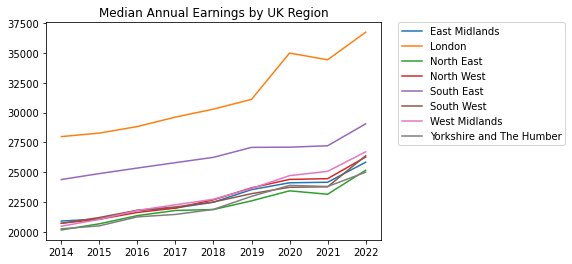

In [21]:
UK_Regions = ["North East", "North West", "Yorkshire and The Humber", "East Midlands", "West Midlands", "East of England", "London", "South East", "South West"]

# creating a dataframe with only UK regions
annual_ts_UK = annual_ts[annual_ts.index.isin(UK_Regions)]

# plotting the median earnings for each row over time       
for i in annual_ts_UK.index:
    plt.plot(annual_ts_UK.columns[2:], annual_ts_UK.loc[i, annual_ts_UK.columns[2:]], label = i)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Median Annual Earnings by UK Region")
plt.show()

In [22]:
# repeating above code but for weekly earnings files
weekly_names = os.listdir('Data4')

median_earnings = []

for i in range(len(weekly_names)):
    t = pd.read_excel("Data4/" + weekly_names[i], sheet_name = "All", skiprows = 4)
    year = weekly_names[i][-8:-4]
    t.rename(columns = {"Median": year}, inplace = True)
    median_earnings.append(t[["Description", year, "Code"]])
    
dfs = [df.set_index('Description') for df in median_earnings]


for i in dfs:
    i.dropna(how = "all", inplace = True) 
    
weekly_ts = dfs[0].join(dfs[1:])
weekly_ts.sort_index(axis = 1, inplace = True)
weekly_ts.columns = weekly_ts.columns.astype(str)
weekly_ts.replace({'x': np.nan}, regex=True, inplace=True)
weekly_ts = weekly_ts[~weekly_ts.index.duplicated(keep='first')]
weekly_ts = weekly_ts.iloc[:, :-7]
weekly_ts.rename(columns = {"Code": "NUTS 3", "Code_x": "ITL 3"}, inplace = True)
first = weekly_ts.pop("NUTS 3")
weekly_ts.insert(0, "NUTS 3", first)
second = weekly_ts.pop("ITL 3")
weekly_ts.insert(0, "ITL 3", second)
weekly_ts

/Users/samarthgowda/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:9165: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Code_x'} in the result is deprecated and will raise a MergeError in a future version.
  joined = merge(


,ITL 3,NUTS 3,2014,2015,2016,2017,2018,2019,2020,2021,2022
Description,,,,,,,,,,,
Aberdeen City and Aberdeenshire,TLM50,UKM50,450.2,459.8,434.8,440.7,467.7,498.3,483.9,497.8,528.6
Angus and Dundee City,TLM71,UKM21,390.6,387.5,403.2,409.6,438.4,451.4,474.1,488.6,517.6
Barking & Dagenham and Havering,TLI52,UKI52,466.4,484.9,502.8,500.9,517.5,527.3,497.5,481.5,516.6
Barnet,TLI71,UKI71,479.1,491.0,485.6,522.6,536.6,536.6,461.1,461.4,524.0
"Barnsley, Doncaster and Rotherham",TLE31,UKE31,378.5,375.0,385.9,391.5,407.5,435.3,429.9,456.8,482.4
...,...,...,...,...,...,...,...,...,...,...,...
Wirral,TLD74,UKD74,404.5,408.6,413.6,417.8,434.8,465.5,406.2,416.8,467.9
Wolverhampton,TLG39,UKG39,378.1,375.0,389.9,395.3,412.0,428.4,476.7,479.2,528.8
Worcestershire,NaN,UKG12,383.3,406.2,408.4,430.4,438.6,450.7,NaN,NaN,NaN


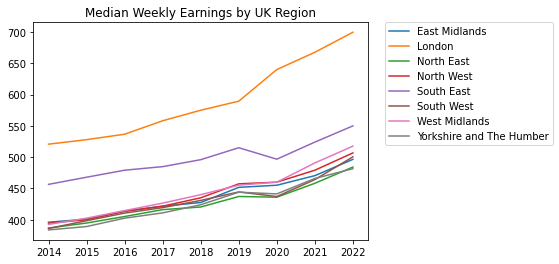

In [23]:
# creating a dataframe with only UK regions
weekly_ts_UK = weekly_ts[weekly_ts.index.isin(UK_Regions)]

# plotting the median earnings for each row over time
for i in weekly_ts_UK.index:
    plt.plot(weekly_ts_UK.columns[2:], weekly_ts_UK.loc[i, weekly_ts_UK.columns[2:]], label = i)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Median Weekly Earnings by UK Region")
plt.show()

In [25]:
annual_ts.to_stata("AnnualEarnings.dta")
weekly_ts.to_stata("WeeklyEarnings.dta")

/Users/samarthgowda/opt/anaconda3/lib/python3.9/site-packages/pandas/io/stata.py:2397: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    ITL 3   ->   ITL_3
    NUTS 3   ->   NUTS_3
    2014   ->   _2014
    2015   ->   _2015
    2016   ->   _2016
    2017   ->   _2017
    2018   ->   _2018
    2019   ->   _2019
    2020   ->   _2020
    2021   ->   _2021
    2022   ->   _2022

If this is not what you expect, please make sure you have Stata-compliant
column names in your DataFrame (strings only, max 32 characters, only
alphanumerics and underscores, no Stata reserved words)

  warnings.warn(ws, InvalidColumnName)
